# 로지스틱회귀분석

### 회귀분석에서의 확률값 P
는 모평균과 표준편차 제곱의 값이 정규분포를 따른다.
$$
P(y|x) = N(w^Tx \times \sigma^2)
$$
- $w^Tx$ : 모평균 $\mu$ (poppular mean)
- $\sigma$ : 모표준편차
- N : 정규분포 or 자연수(Natural Number)
- P : 유의확률 (P-value, probability value)


때문에, 
- $y \sim N$ : y값은 정규분포(N)를 따르는 모든 값을 가질 수 있다.

### 로지스틱 회귀분석

종속변수 $y$의 값이 특정한 구간 **(0~$N$) 사이의 정수값만을 가지는 이항분포(Binomial Distribution) 따른 다**고 가정할때, 사용 가능한 분류분석 법이다.

**[해석]**

$$
P(y|x) = Bin(y; \mu(x), N)
$$
- 함수명(변수명;파라미터) : 변수명은 입력 변수, 파라미터는 함수 내부에서 사용되는 파라미터.  
- 이항분포(Bin) : x를 따르는 모평균으로 부터 구해진 값 y에서 N 까지의 이항분포를 따른다.
<br/>
<br/>
이때, 

$$
P(y|x) = Bern(y; \mu(x))
$$
- 카테고리값의 수가 1 일때 즉$(N=1)$ 일때는, (0과 1의 카테고리 값만을 가지는 베르누이 분포를 따르게 된다.

- 베르누이분포(Bern) : ($\mu(x)$ : x값에 따라 y 가 1이 나올 확률) 가 0.5보다 크면 1, 0.5보다 작으면 0이 출력된다.

In [ ]:
import sklearn.linear_model import LogisticRegression

## 시그모이드 함수 (sigmoid function)
- S like : S자와 닮았다라는 의미로 시그모이드 라고 불리운다.
- 시그모이드 함수는 **종속변수 x 의 모든 실수 값에 대해 한정된(bounded) 값을 가지는 특성**이 있다.
- 항상 양의 기울기(x가 증가하면 y도 증가한다)를 가지는 단조증가의 집합을 말한다.


$$a > b \rightarrow f(a) > f(b)$$


**[대표적인 시그모이드 함수들]**
- **로지스틱 함수 (Logistic Function) : 대표적인 시그모이드 함수.**
$$Logistic(z) = \mu (z) = {1 \over 1+exp(-z)}$$
- 하이퍼볼릭탄젠트 (Hyperbolic tangent) : 로지스틱 함수의 기울기의 4배
$$tanh(z) = {sinh z \over cosh z} = {(e^z - e^-z) / 2 \over (e^z + e^-z)/2} = 2a(2z)-1$$
- 오차함수(Error Function) : 
$$erf(z) = {2 \over \sqrt{\pi}} \int^z_0 e^{t^2}dt$$


### 로지스틱 함수
로지스틱 함수는 **음의 무한대부터 양의 무한대까지의 실수값을 0과 1 사이의 실수 값으로 1:1 대응 시키는 시그모이드 함수**이다. 일반적으로 시그모이드 함수라고 하면 로지스틱 함수를 가리킨다.

$$Logistic(z) = \mu (z) = {1 \over 1+exp(-z)}$$

**[가정의 시작]**

- 모평균 $\mu$ 는 0과 1 사이의 값을 가져야 한다.
- 모평균 $\mu = w^Tx$ 와 같다.
- 때문에 모평균$w^Tx$ 를 0과 1 사이로 제한하는 함수 $\sigma$ 가 필요하다.
- 함수 $\sigma$ 는 $-\infty$ 에서 $\infty$ 출력 결과를 생성할 수 있다.
- 이를 로지스틱 함수에 적용하면 0과 1 사이의 값을 가질 수 있는데. 이때 **무한대의 함수를 0과 1로 대응 되도록 연결 짓는 함수가 Logit Function** 이다.
$$z = logit(odds\;ratio) = log({\mu \over 1-\mu})$$


**선형 판별함수**
- 로지스틱 함수는 확률적 판별 모형의 하나로 **판별 함수(decision function) z의 결과로 분류** 문제를 해결 한다.
- z = 0 일때 $\mu$ = 0.5
- z > 0 일때 $\mu$ > 0.5 $\rightarrow \hat{y} = 1$
- z < 0 일때 $\mu$ < 0.5 $\rightarrow \hat{y} = 0$

판별 함수 z 가 아래와 같을때 로지스틱모델의 영역 경계면은 선형이라는 것을 알수 있다.
$$z=w^Tx$$

## 로지스틱 회귀분석 모형의 모수 추정

로지스틱 회귀분석 모형의 모수 w 는 최대가능도(Maximum Likelihood Eximation, MLE) 방법으로 추정 할 수 있다.

## StatsModels 패키지의 로지스틱 회귀

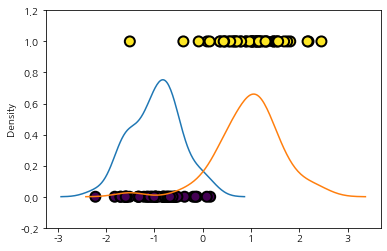

In [1]:
from sklearn.datasets import make_classification
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1,
                           n_clusters_per_class=1, random_state=4)

plt.scatter(X0, y, c=y, s=100, edgecolor="k", linewidth=2)
sns.distplot(X0[y==0, :], label="y = 0", hist=False)
sns.distplot(X0[y==1, :], label="y = 1", hist=False)
plt.ylim(-0.2, 1.2)
plt.show() 

In [2]:
X = sm.add_constant(X0)
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Fri, 26 Nov 2021   Pseudo R-squ.:                  0.7679
Time:                        12:47:20   Log-Likelihood:                -16.084
converged:                       True   LL-Null:                       -69.295
Covariance Type:            nonrobust   LLR p-value:                 5.963e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2515      0.477      0.527      0.598      -0.683       1.186
x1             4.2382      0.902      4.699      0.000       2.470       6.006


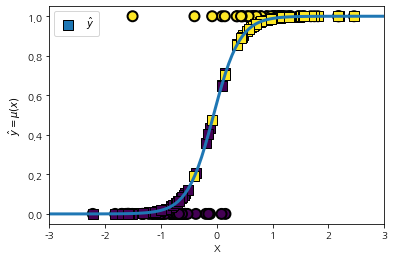

In [3]:
# 시그모이드 함수 예측 결과
import numpy as np
xx = np.linspace(-3, 3, 100)
mu = logit_res.predict(sm.add_constant(xx))

plt.plot(xx, mu, lw=3)
plt.scatter(X0, y, c=y, s=100, edgecolor="k", lw=2)
plt.scatter(X0, logit_res.predict(X), label=r"$\hat{y}$", marker="s", 
            c=y, s=100, edgecolor="k", lw=1)
plt.xlim(-3, 3)
plt.xlabel("X")
plt.ylabel(r"$\mu")
plt.ylabel(r"$\hat{y} = \mu(x)$")
plt.legend()
plt.show()

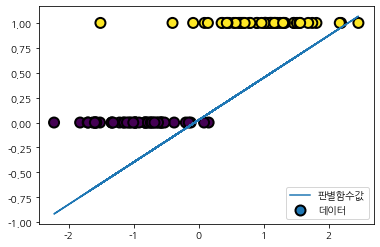

In [4]:
# 선형 판별함수를 이
plt.scatter(X0, y, c=y, s=100, edgecolor="k", lw=2, label="데이터")
plt.plot(X0, logit_res.fittedvalues * 0.1, label="판별함수값")
plt.legend()
plt.show()

## 로지스틱 회귀 성능 측정

로지스틱 회귀의 성능 측정은 맥파든 의사결정계수(McFadden psuedo R square) 값으로 측정 한다.  
맥파든 의사결정 계수는 예측값이 0일때와 1일때의 이탈도 $G(deviance)$ 비율을 계산한 값이다.

$$
R^2_{psuedo} = 1 - {G^2 \over G^2_0}
$$

In [5]:
# G Square 의 계산
from sklearn.metrics import log_loss

y_hat = logit_res.predict(X)
log_loss(y, y_hat, normalize=False)

16.084355200413036